In [1]:
%load_ext autoreload
%autoreload 2

#pip install antspyx

#Source: https://antspy.readthedocs.io/en/latest/registration.html


#./stitching -i /media/data/NAKO/MRT/3D_GRE_TRA_F/100000_30/ses-20161014/sub-100000_30_ses-20161014_sequ-4_mr.nii.gz /media/data/NAKO/MRT/3D_GRE_TRA_F/100000_30/ses-20161014/sub-100000_30_ses-20161014_sequ-3_mr.nii.gz /media/data/NAKO/MRT/3D_GRE_TRA_F/100000_30/ses-20161014/sub-100000_30_ses-20161014_sequ-2_mr.nii.gz /media/data/NAKO/MRT/3D_GRE_TRA_F/100000_30/ses-20161014/sub-100000_30_ses-20161014_sequ-1_mr.nii.gz -o out2.nii.gz



[*] Save /tmp/mr.nii.gz
[*] Save /tmp/ct.nii.gz


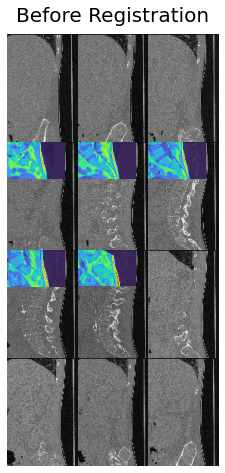

antsRegistration -d 3 -r [0x55ee55f56150,0x55ee55f56340,1] -m mattes[0x55ee55f56150,0x55ee55f56340,1,32,regular,0.2] -t Affine[0.25] -c 2100x1200x1200x0 -s 3x2x1x0 -f 4x2x2x1 -x [NA,NA] -m mattes[0x55ee55f56150,0x55ee55f56340,1,32] -t SyN[0.200000,3.000000,0.000000] -c [40x20x0,1e-7,8] -s 2x1x0 -f 4x2x1 -u 1 -z 1 -o [/tmp/tmpt3_v5lm7,0x55ee55d01a10,0x55ee55f71080] -x [NA,NA] --float 1 --write-composite-transform 0 -v 1
All_Command_lines_OK
Using single precision for computations.
The composite transform comprises the following transforms (in order): 
  1. Center of mass alignment using fixed image: 0x55ee55f56150 and moving image: 0x55ee55f56340 (type = Euler3DTransform)
  Reading mask(s).
    Registration stage 0
      No fixed mask
      No moving mask
    Registration stage 1
      No fixed mask
      No moving mask
  number of levels = 4
  number of levels = 3
  fixed image: 0x55ee55f56150
  moving image: 0x55ee55f56340
  fixed image: 0x55ee55f56150
  moving image: 0x55ee55f56340
D

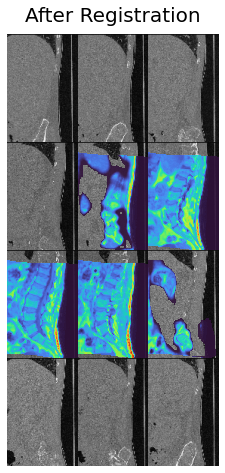

In [12]:
import ants  # antspyx,
from pathlib import Path
import time

# fi = ants.image_read('/media/data/NAKO/MRT/3D_GRE_TRA_F/100000_30/ses-20161014/sub-100000_30_ses-20161014_sequ-4_mr.nii.gz')
# mi = ants.image_read('/media/data/NAKO/MRT/3D_GRE_TRA_F/100000_30/ses-20161014/sub-100000_30_ses-20161014_sequ-3_mr.nii.gz')
# mytx = ants.registration(fixed=fi, moving=mi, type_of_transform = 'Affine' )
# ants.image_write(mytx['warpedmovout'],'/media/data/robert/programme/stitching/stitching/build/stitching/reg3.nii.gz')
mr = "/media/data/robert/datasets/2022_06_21_T1_CT_wopathfx/dataset_org/rawdata/fxclass0001/20190510_0135609116/sub-fxclass0001_dir-sag_sequ-T1WTSE301_T1.nii.gz"
ct = "/media/data/robert/datasets/2022_06_21_T1_CT_wopathfx/dataset_org/rawdata/fxclass0001/20190404_0135449541/sub-fxclass0001_dir-iso_sequ-WSKFfurMPRiDose4201_ct.nii.gz"
msk = "/media/data/robert/datasets/2022_06_21_T1_CT_wopathfx/dataset_org/derivatives/fxclass0001/20190404_0135449541/sub-fxclass0001_dir-iso_sequ-WSKFfurMPRiDose4201_seg-vert_msk.nii.gz"
tmp = Path("/tmp/ct.nii.gz")
tmp_msk = Path("/tmp/msk.nii.gz")
tmp2 = Path("/tmp/mr.nii.gz")
from BIDS import NII

# tmp.unlink()
# tmp2.unlink()
zoom = (1, 1, 1)
mr_nii = NII.load(Path(mr), False, 0)
if not tmp2.exists():
    mr_nii.rescale_(zoom)
    mr_arr = mr_nii.get_array()
    mr_arr = mr_arr / mr_arr.max()
    mr_out = mr_nii.set_array(mr_arr)
    mr_out.save(tmp2)
if not tmp.exists():
    msk_nii = NII.load(Path(msk), True)
    msk_nii.reorient_same_as_(mr_nii)
    msk_nii.rescale_(zoom)
    msk_arr = msk_nii.get_array()
    msk_arr[msk_arr != 0] = 1

    ct_nii = NII.load(Path(ct), False, -1000)
    ct_nii.reorient_same_as_(mr_nii)
    ct_nii.rescale_(zoom)
    ct_arr = ct_nii.get_array()
    ct_arr += 1000
    ct_arr = ct_arr / 2000.0
    ct_arr *= msk_arr
    ct_out = ct_nii.set_array(ct_arr)
    ct_out.save(tmp)

fixed = ants.image_read(str(tmp))
# fixed = ants.resample_image(fixed,mr_nii.shape,1,0)
moving = ants.image_read(str(tmp2))
# ants.resample_image(moving,mr_nii.shape,1,0)
ants.plot(fixed, overlay=moving, title="Before Registration")
mytx = ants.registration(fixed=fixed, moving=moving, type_of_transform="SyN", verbose=False)
# print(mytx)
warped_moving = mytx["warpedmovout"]
ants.plot(fixed, overlay=warped_moving, title="After Registration", alpha=0.4)

warped_moving.to_file("/tmp/mr_moving.nii.gz")

In [ ]:
import ants  # antspyx,

# fi = ants.image_read('/media/data/NAKO/MRT/3D_GRE_TRA_F/100000_30/ses-20161014/sub-100000_30_ses-20161014_sequ-4_mr.nii.gz')
# mi = ants.image_read('/media/data/NAKO/MRT/3D_GRE_TRA_F/100000_30/ses-20161014/sub-100000_30_ses-20161014_sequ-3_mr.nii.gz')
# mytx = ants.registration(fixed=fi, moving=mi, type_of_transform = 'Affine' )
# ants.image_write(mytx['warpedmovout'],'/media/data/robert/programme/stitching/stitching/build/stitching/reg3.nii.gz')


fixed = ants.image_read(ants.get_ants_data("r16"))  # .resample_image((64,64),1,0)
moving = ants.image_read(ants.get_ants_data("r64"))  # .resample_image((64,64),1,0)
fixed.plot(overlay=moving, title="Before Registration")
mytx = ants.registration(fixed=fixed, moving=moving, type_of_transform="SyN")
# print(mytx)
warped_moving = mytx["warpedmovout"]
fixed.plot(overlay=warped_moving, title="After Registration")

In [ ]:
ants.plot(mi, None, crop=True)
ants.plot(mytx["warpedmovout"], None, crop=True)
ants.plot(fi, None, crop=True)


# https://github.com/ANTsX/ANTsPy/blob/master/ants/registration/landmark_transforms.py

In [ ]:
mytx

[[  -0.45117188    0.            0.           63.45281219]
 [   0.            0.45117188    0.         -267.77722168]
 [   0.            0.            0.40000001 -376.07714844]
 [   0.            0.            0.            1.        ]]
[[  -0.45117188    0.            0.           63.45281219]
 [   0.            0.45117188    0.         -267.77722168]
 [   0.            0.            0.40000001 -376.07714844]
 [   0.            0.            0.            1.        ]]


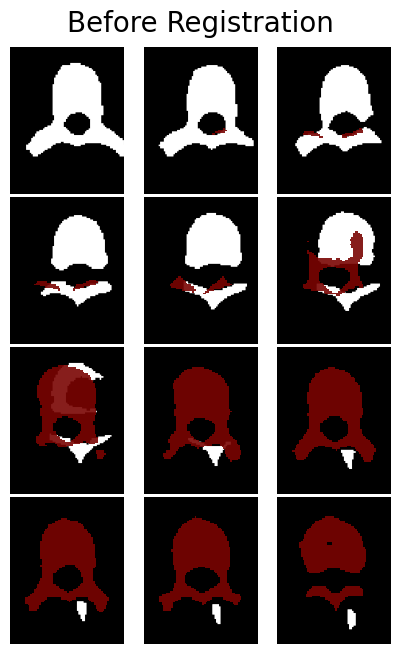

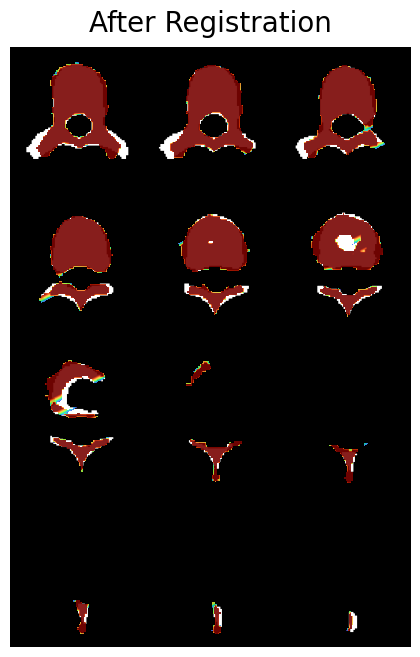

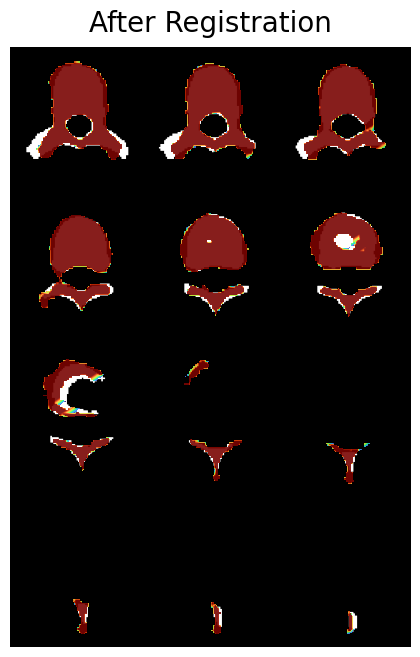

In [40]:
import ants
import nibabel as nib
import numpy as np


def load(idx):
    ct = nib.load(f"../vertebra_align/{idx}_o.nii.gz")
    affine = ct.affine
    print(ct.affine)
    # ct = nib.Nifti1Image(ct.get_fdata(),np.eye(4),ct.header)
    # slice = ct.get_fdata()[...,110]
    slice = ct.get_fdata()
    # slice = np.flip(slice,axis=1)
    fixed = ants.from_numpy(slice.transpose((2, 0, 1)))
    slice /= np.max(slice)
    # fixed.set_spacing(np.abs(np.diag(affine)).tolist()[:3])
    return fixed
    # fixed[1]
    # fixed.plot(title=idx)


fixed = load(15)
moving = load(17)

# "Translation": Translation transformation.
# "Rigid": Rigid transformation: Only rotation and translation.
# "Similarity": Similarity transformation: scaling, rotation and translation.
# "QuickRigid": Rigid transformation: Only rotation and translation. May be useful for quick visualization fixes.'
# "DenseRigid": Rigid transformation: Only rotation and translation. Employs dense sampling during metric estimation.'
# "BOLDRigid": Rigid transformation: Parameters typical for BOLD to BOLD intrasubject registration'.'
# "Affine": Affine transformation: Rigid + scaling.
# "AffineFast": Fast version of Affine.
# "BOLDAffine": Affine transformation: Parameters typical for BOLD to BOLD intrasubject registration'.'
# "TRSAA": translation, rigid, similarity, affine (twice). please set regIterations if using this option. this would be used in cases where you want a really high quality affine mapping (perhaps with mask).
# "Elastic": Elastic deformation: Affine + deformable.
# "ElasticSyN": Symmetric normalization: Affine + deformable transformation, with mutual information as optimization metric and elastic regularization.
# "SyN": Symmetric normalization: Affine + deformable transformation, with mutual information as optimization metric.
# "SyNRA": Symmetric normalization: Rigid + Affine + deformable transformation, with mutual information as optimization metric.
# "SyNOnly": Symmetric normalization: no initial transformation, with mutual information as optimization metric. Assumes images are aligned by an inital transformation. Can be useful if you want to run an unmasked affine followed by masked deformable registration.
# "SyNCC": SyN, but with cross-correlation as the metric.
# "SyNabp": SyN optimized for abpBrainExtraction.
# "SyNBold": SyN, but optimized for registrations between BOLD and T1 images.
# "SyNBoldAff": SyN, but optimized for registrations between BOLD and T1 images, with additional affine step.
# "SyNAggro": SyN, but with more aggressive registration (fine-scale matching and more deformation). Takes more time than SyN.
# "TV[n]": time-varying diffeomorphism with where 'n' indicates number of time points in velocity field discretization. The initial transform should be computed, if needed, in a separate call to ants.registration.
# "TVMSQ": time-varying diffeomorphism with mean square metric
# "TVMSQC": time-varying diffeomorphism with mean square metric for very large deformation
# "antsRegistrationSyN[x]": recreation of the antsRegistrationSyN.sh script in ANTs where 'x' is one of the transforms available (e.g., 't', 'b', 's')
# "antsRegistrationSyNQuick[x]": recreation of the antsRegistrationSyNQuick.sh script in ANTs where 'x' is one of the transforms available (e.g., 't', 'b', 's')
# "antsRegistrationSyNRepro[x]": reproducible registration. x options as above.
# "antsRegistrationSyNQuickRepro[x]": quick reproducible registration. x options as above
# print(mytx)
fixed.plot(overlay=moving, title="Before Registration")


def reg(type_of_transform="TRSAA"):
    mytx = ants.registration(fixed=fixed, moving=moving, type_of_transform=type_of_transform)
    warped_moving = mytx["warpedmovout"]
    fixed.plot(overlay=warped_moving, title="After Registration")


reg()
# reg("BOLDAffine")
reg("Rigid")

In [13]:
fixed

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (400, 350, 400)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

[*] Save /tmp/mr.nii.gz as uint16


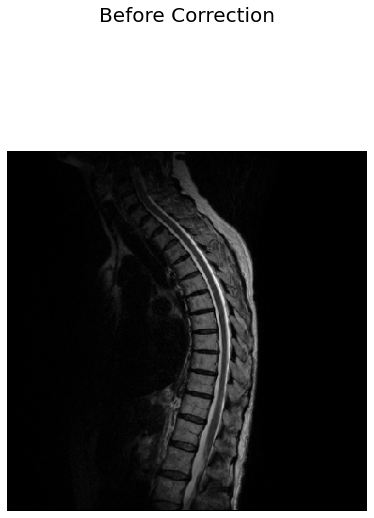

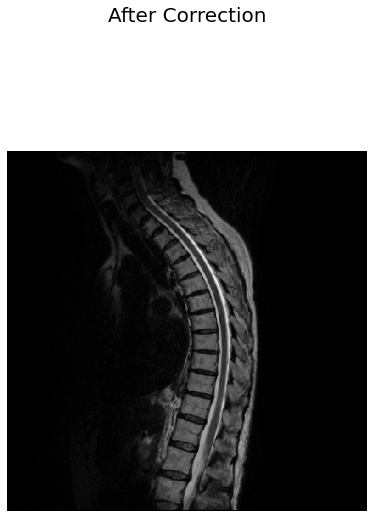

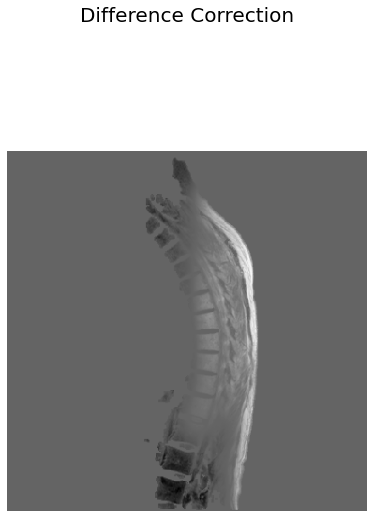

[*] Save /media/data/NAKO_test/test.nii.gz as float32
[*] Save /media/data/NAKO_test/dif.nii.gz as float32
[*] Save /media/data/NAKO_test/og.nii.gz as float32
(slice(151, 313, None), slice(7, 447, None), slice(0, 21, None))


In [21]:
import ants  # antspyx,
from pathlib import Path
import time
import ants.utils.bias_correction as bc

mr = "/media/data/NAKO/NAKO/MRT/rawdata/100/sub-100008/T2w/sub-100008_acq-sag_chunk-BWS_sequ-6946_T2w.nii.gz"
tmp = Path("/tmp/mr.nii.gz")
from BIDS import NII

mr_nii = NII.load(Path(mr), False)
mr_nii.save(tmp)

moving = ants.image_read(str(tmp))
ants.plot(moving, title="Before Correction", figsize=5, nslices=1)
out = bc.n4_bias_field_correction(
    moving,
    mask=None,
    shrink_factor=4,
    convergence={"iters": [50, 50, 50, 50], "tol": 1e-07},
    spline_param=200,
    verbose=False,
    weight_mask=None,
)
import ants.core.ants_image

ants.plot(out, title="After Correction", figsize=5, nslices=1)

ants.plot((moving - out), title="Difference Correction", figsize=5, nslices=1)

dif = NII((moving - out).to_nibabel())
da = dif.get_array()
da[da != 0] = 1
dif.set_array_(da)
crop = dif.compute_crop_slice()
out = NII(out.to_nibabel())
out = out.apply_crop_slice_(crop)
out.save("/media/data/NAKO_test/test.nii.gz")

dif = dif.apply_crop_slice_(crop)
dif.save("/media/data/NAKO_test/dif.nii.gz")

dif = NII(moving.to_nibabel()).apply_crop_slice_(crop)
dif.save("/media/data/NAKO_test/og.nii.gz")
print(crop)
# mytx = ants.registration(fixed=fixed, moving=moving, type_of_transform="SyN", verbose=False)
# print(mytx)
# warped_moving = mytx["warpedmovout"]
# ants.plot(fixed, overlay=warped_moving, title="After Registration", alpha=0.4)

# warped_moving.to_file("/tmp/mr_moving.nii.gz")